#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

#Reading the dataset

In [ ]:
ds=pd.read_csv("/content/dataset_website.csv")

In [ ]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


#Checking for Null values in a dataset and handling if any

In [ ]:
ds.info()
ds.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

#Splitting data into independent and dependent variables

#Identifying Independent & dependent variables:

In [ ]:
x = ds.iloc[:,1:31].values
y = ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


#Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_train[0]

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  0, -1, -1,  1,
        1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [ ]:
y_train[0:10]

array([ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1])

In [ ]:
x_test[0:10]

array([[ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  0, -1,
         1,  1,  0,  1,  1, -1,  1, -1, -1, -1, -1,  1,  0,  1],
       [ 1, -1,  1,  1,  1, -1,  0, -1, -1,  1,  1,  1,  1, -1,  0, -1,
         1,  1,  0,  1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  1],
       [ 1, -1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1,  1,  0, -1, -1,
         1,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1],
       [ 1, -1,  1,  1,  1, -1,  0, -1, -1,  1,  1,  1, -1,  0, -1, -1,
         1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0,  1],
       [ 1, -1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1,  1,  0, -1, -1,
         1,  1,  0,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
        -1,  1,  0,  1,  1, -1,  1,  1,  1,  1, -1,  1,  0, -1],
       [ 1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  0,  1,  1,
         1,  1,  0,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1, -1, -1,  

In [ ]:
y_test[0:10]

array([-1, -1, -1, -1,  1,  1,  1, -1, -1,  1])

In [ ]:
ds.shape

(11055, 32)

In [ ]:
a=len(ds[ds.Result==0])
b=len(ds[ds.Result==-1])
c=len(ds[ds.Result==1])

In [ ]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [ ]:
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 8844 samples.
Testing set has 2211 samples.


#Lets apply Logistic Regression and check its accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_predict= lr.predict(x_test)

In [ ]:
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(lr_predict,y_test))

The accurcy of Logistic Regression Model is :  91.67797376752601


In [ ]:
print(classification_report(lr_predict,y_test))

              precision    recall  f1-score   support

          -1       0.89      0.92      0.91       980
           1       0.94      0.91      0.92      1231

    accuracy                           0.92      2211
   macro avg       0.91      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
def plot_confusion_matrix(y_test, lr_predict):
 C = confusion_matrix(y_test, lr_predict)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

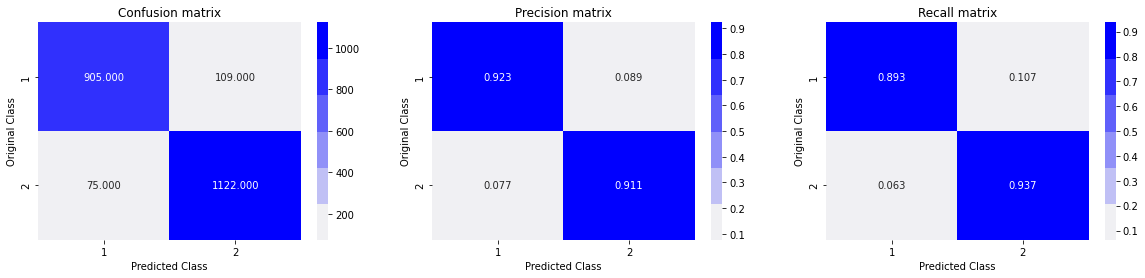

In [ ]:
plot_confusion_matrix(y_test, lr_predict)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


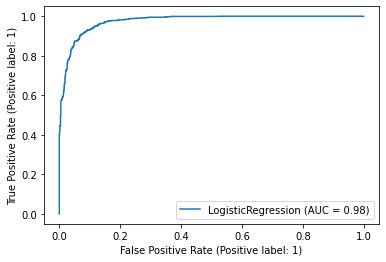

In [ ]:
plot_roc_curve(lr,x_test, y_test)

In [ ]:
import pickle
pickle.dump(lr,open('Phishing_website.pk1','wb'))

# Decision Tree Classifier and check its classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_predict=dtree.predict(x_test)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,y_test))

The accuracy of Decision Tree Classifier is:  96.24604251469923


In [ ]:
print(classification_report(dtree_predict,y_test))

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       993
           1       0.97      0.96      0.97      1218

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



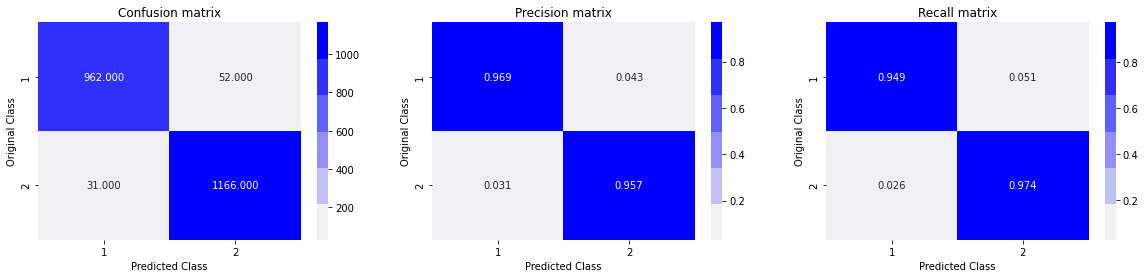

In [ ]:
plot_confusion_matrix(y_test, dtree_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


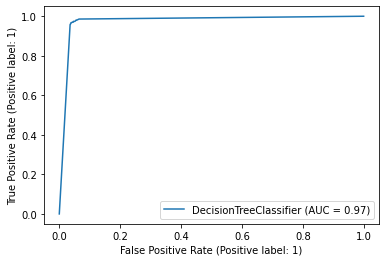

In [ ]:
plot_roc_curve(dtree,x_test, y_test)

In [ ]:
import pickle
pickle.dump(dtree,open('Phishing_website.pk1','wb'))

#Random Forest Classifier and check its accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_predict=rfc.predict(x_test)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of Random Forest Classifier is:  96.87924016282226


In [ ]:
print(classification_report(rfc_predict,y_test))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97       977
           1       0.99      0.96      0.97      1234

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



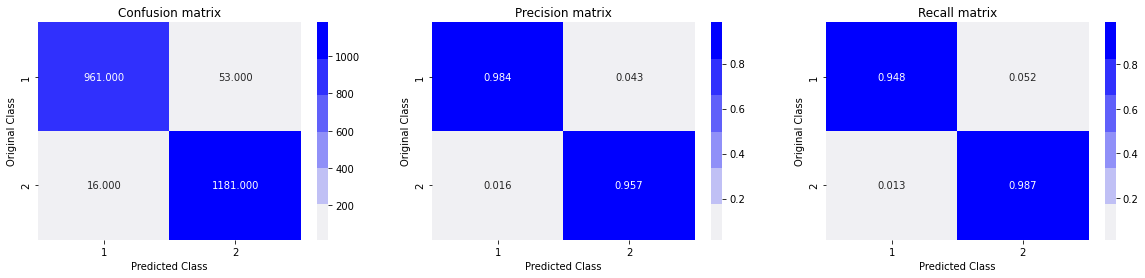

In [ ]:
plot_confusion_matrix(y_test, rfc_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


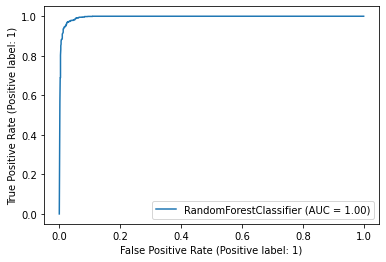

In [ ]:
plot_roc_curve(rfc,x_test, y_test)

In [ ]:
import pickle
pickle.dump(rfc,open('Phishing_website.pk1','wb'))

#SVM and check its accuracy

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
svm_predict=svc.predict(x_test)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,y_test))

The accuracy of SVM Classifier is:  94.07507914970601


In [ ]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93       983
           1       0.96      0.93      0.95      1228

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



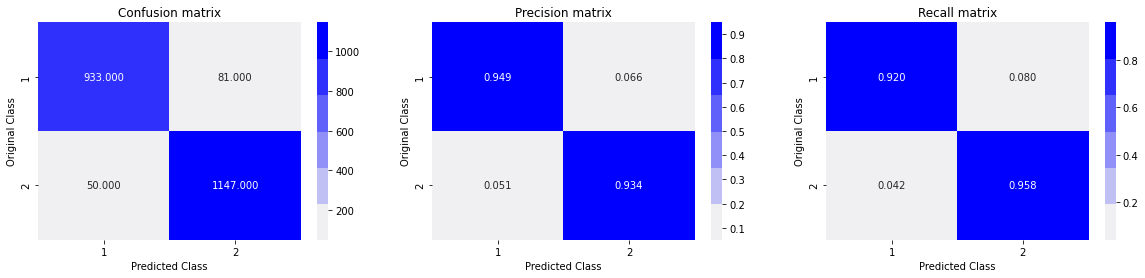

In [ ]:
plot_confusion_matrix(y_test, svm_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


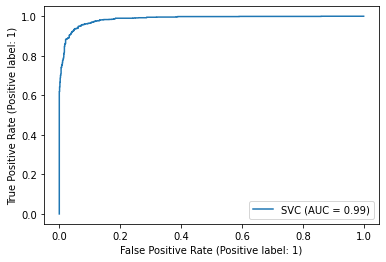

In [ ]:
plot_roc_curve(svc,x_test, y_test)

In [ ]:
import pickle
pickle.dump(svc,open('Phishing_website.pk1','wb'))

#K-Nearest Neighbors Classifier and check its accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Model Training
#KNN Classifier for K = 1

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_predict=knn.predict(x_test)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,y_test))

The accuracy of KNN Model is:  96.29127091813659


In [ ]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.98      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



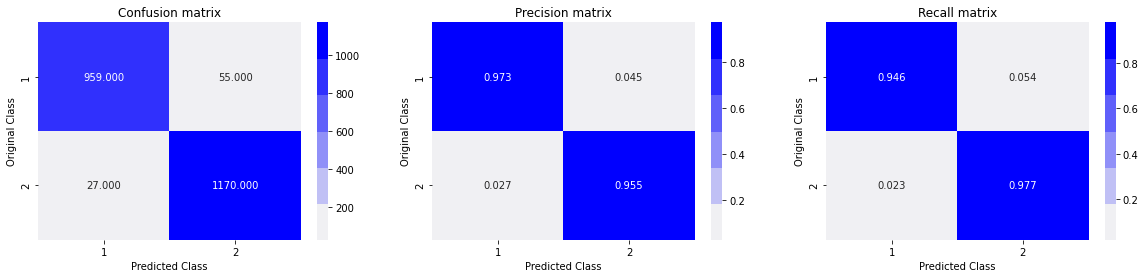

In [ ]:
plot_confusion_matrix(y_test, knn_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


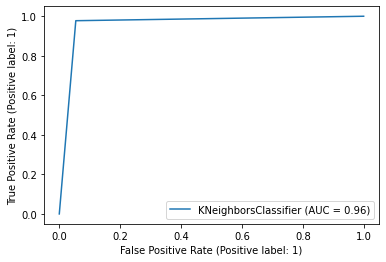

In [ ]:
plot_roc_curve(knn,x_test, y_test)

In [ ]:
import pickle
pickle.dump(knn,open('Phishing_website.pk1','wb'))

In [ ]:
print('Logistic Regression Accuracy:',100 * accuracy_score(lr_predict,y_test))
print('K-Nearest Neighbour Accuracy:',100* accuracy_score(knn_predict,y_test))
print('Decision Tree Classifier Accuracy:',100* accuracy_score(dtree_predict,y_test))
print('Random Forest Classifier Accuracy:',100*accuracy_score(rfc_predict,y_test))
print('support Vector Machine Accuracy:',100*accuracy_score(svm_predict,y_test))

Logistic Regression Accuracy: 91.67797376752601
K-Nearest Neighbour Accuracy: 96.29127091813659
Decision Tree Classifier Accuracy: 96.24604251469923
Random Forest Classifier Accuracy: 96.87924016282226
support Vector Machine Accuracy: 94.07507914970601


#From all the models we developed , Random Forest accuracy has highest accuracy .Lowest accuracy model is support Vector Machine

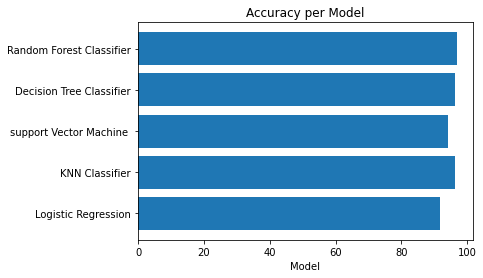

<Figure size 432x288 with 0 Axes>

In [ ]:
objects = ('Logistic Regression', 'KNN Classifier', 'support Vector Machine ','Decision Tree Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(objects))
performance = [91.67797376752601, 96.29127091813659,94.07507914970601 , 96.24604251469923,96.87924016282226]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy per Model')
plt.show()
plt.savefig('accuracy_per_model.png')

In [ ]:
import pickle
pickle.dump(svc,open('Phishing_website.pk1','wb'))